# Supplemental Figure: 
### Plot qq plot to compare distribution of LogLR values with the chisq (df=1) distribution

In [1]:
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Per_locus_validation_functions import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib import pyplot as plt
PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/qq_plot/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Function to plot QQ plot
def plot_figure(fig_num, per, opt_allele_list, LogLR_vals_dic, abc_model):
    
    '''
    # Remove negative LogLR values
    
    LogLR_vals_dic_no_neg = {}
    
    for opt_allele in opt_allele_list:
        LogLR_vals_dic_no_neg[opt_allele] = []
        LogLR_list = LogLR_vals_dic[opt_allele]
        for LogLR in LogLR_list:
            if LogLR >= 0:
                LogLR_vals_dic_no_neg[opt_allele].append(LogLR)
                
    LogLR_vals_dic = LogLR_vals_dic_no_neg
    '''
    
    # Get minimum length of all LogLR lists 
    # Sometimes, less than 200 values in LogLR list since
    # <10 s accepted for ABC on some simulations
    min_length = 500
    for opt_allele in opt_allele_list:
        length = len(LogLR_vals_dic[opt_allele])
        if length < min_length:
            min_length = length
    
    # Plot Chi-square distribution
    fig_num = fig_num + 1
    plt.figure(fig_num)
    
    exp_list = [0] * int(min_length/2)
    num_chisq = min_length - int(min_length/2)
    p_val_unif = np.arange(1, num_chisq+1)/(num_chisq+1)
    chisq_values = list(stats.chi2.ppf(p_val_unif, 1))
    exp_list.extend(chisq_values)
    exp_list.sort()
    plt.hist(exp_list, bins = 20, weights=np.ones(len(exp_list)) / len(exp_list), color='green') #weights=np.ones(exp_list) / len(exp_list))
    plt.title('Plot of mixture distribution: 50% 0, 50 % chisq (df=1) distribution')
    plt.savefig(PLOTDIR + 'Chisq/Chisq_for_per_%d.pdf'%(per), bbox_inches='tight')
    
    for opt_allele in opt_allele_list:
        LogLR_list = LogLR_vals_dic[opt_allele]
        
        # Plot histogram of LogLR values
        fig_num = fig_num + 1
        plt.figure(fig_num)
        plt.hist(LogLR_list, bins = 20, weights=np.ones(len(LogLR_list)) / len(LogLR_list)) 
        plt.title('Plot of LogLR values \n Per %d Opt %d'%(per, opt_allele))
        plt.xlabel('LogLR value')
        plt.ylabel('Fraction of values')
        plt.savefig(PLOTDIR + 'LogLR/LogLR_per_%d_opt_%d.pdf'%(per,opt_allele), bbox_inches='tight')
        
        # Plot histogram of LogLR values where negative values are set to 0
        fig_num = fig_num + 1
        plt.figure(fig_num)
        LogLR_list_no_neg = [0 if i < 0 else i for i in LogLR_list] 
        LogLR_list_no_neg.sort()
        plt.hist(LogLR_list_no_neg, bins = 20, weights=np.ones(len(LogLR_list_no_neg)) / len(LogLR_list_no_neg)) 
        plt.title('Plot of LogLR values (setting negative values to 0) \n Per %d Opt %d'%(per, opt_allele))
        plt.xlabel('LogLR value')
        plt.ylabel('Fraction of values')
        plt.savefig(PLOTDIR + 'LogLR/LogLR_no_neg_per_%d_opt_%d.pdf'%(per,opt_allele), bbox_inches='tight')
        
    # Plot QQ plot LogLR v chisq distribution
    fig_num = fig_num + 1
    plt.figure(fig_num)
    x_max = max(exp_list)
    for opt_allele in opt_allele_list:
        LogLR_list = LogLR_vals_dic[opt_allele][0:min_length]
        LogLR_list_no_neg = [0 if i < 0 else i for i in LogLR_list] 
        LogLR_list_no_neg.sort()
        plt.scatter(exp_list, LogLR_list_no_neg, s=5, label=str(opt_allele)) 
    
        x_max_observed = max(LogLR_list_no_neg)
        if x_max_observed > x_max:
            x_max = x_max_observed
    plt.plot([0,x_max],[0,x_max],c='black')
    
    plt.title('LogLR v Mixture distribution \n Per %d'%(per))
    plt.xlabel("Expected LogLR (Mixture distribution - 50% 0, 50% chisq (df=1))")
    plt.ylabel("Observed LogLR")
    plt.legend()
    plt.savefig(PLOTDIR + 'qq_LogLR/qq_LogLR_per_%d.pdf'%(per), bbox_inches='tight')
     
    '''
    # Plot QQ plot of p values of LogLR v chisq distribution
    fig_num = fig_num + 1
    plt.figure(fig_num)
    
    p_val_exp = []
    for elem in exp_list:
        pval = chi2.sf(elem, 1) 
        p_val_exp.append(-np.log10(pval))
    x_max = max(p_val_exp)
    p_val_exp.sort()
    
    # Generate p_vals_dic
    p_vals_dic = {}
    for opt_allele in opt_allele_list:
        p_vals_dic[opt_allele] = []
        LogLR_list = LogLR_vals_dic[opt_allele][0:min_length]
        for LogLR in LogLR_list:
            pval = chi2.sf(LogLR, 1) 
            p_vals_dic[opt_allele].append(-np.log10(pval))
        
    for opt_allele in opt_allele_list:
        p_val_obs = p_vals_dic[opt_allele][0:min_length]
        
        p_val_obs.sort()
        
        plt.scatter(p_val_exp, p_val_obs, s=5, label=str(opt_allele)) # color="black", label='coding')
    
        x_max_observed = max(p_val_obs)
       
        if x_max_observed > x_max:
            x_max = x_max_observed
    
    plt.plot([0,x_max],[0, x_max], c='black')
    plt.title('LogLR v chisq (df=1) -log10(p) distribution \n Per %d'%(per))
    plt.xlabel("Expected -log10(p) (chisq df=1)")
    plt.ylabel("Observed -log10(p)")
    plt.legend()
    #plt.savefig(PLOTDIR + 'qq_p_val/qq_p_val_per_%d.pdf'%(per), bbox_inches='tight')
    '''
    print('Done figure ' + str(fig_num))
    return fig_num

In [3]:
# Function to validate ABC and LRT
def validate(per, opt_allele, s_vals, use_het, use_common, use_bins, num_bins, abc_model, lrt_model, fig_num):
    
    opt_allele_list, s_vals_dic, errors_s_dic, s_vals, p_vals_dic, errors_p_dic, eps_bins, LogLR_vals_dic = validate_per_locus(per, \
    opt_allele, s_vals, use_het, use_common, use_bins, num_bins, abc_model, lrt_model)
    
    # Plot QQ Plot
    fig_num = fig_num + 1
    fig_num = plot_figure(fig_num, per, opt_allele_list, LogLR_vals_dic, abc_model)
    return fig_num

In [4]:
def main():
    print('Running main')
    
    # List of periods to show distribution of LogLR 
    per_list = [2,3,4] 
    
    # Dictionary of optimal alleles 
    # Key: period, Value: string of optimal alleles to validate separated by commas
    opt_alleles = {}
    opt_alleles[1] = '16,24,32,40'
    opt_alleles[2] = '11,14,17,20' # ,14,17,20
    opt_alleles[3] = '5,8,10,13'
    #opt_alleles[3] = '5,6,7,8,9,10,11,12'
    opt_alleles[4] = '7,8,9,10'
    
    s_vals = '0'
    
    # Summary statistics to use - 'y' = yes, 'n' = no
    use_het = 'y'
    use_common = 'n'
    use_bin = 'y'
    
    #num_bins_list = [3,5,7] # Number of bins to use for validation
    num_bins_list = [5]
    
    # Priors to use 
    model_list = [('eurodem_prior2','eurodem_0810')] 
    fig_num = 0
    
    # Run validation
    for per in per_list:
        for num_bins in num_bins_list:
            for model in model_list:
                fig_num = validate(per, opt_alleles[per], s_vals, use_het, use_common, use_bin, num_bins, model[0], model[1], fig_num)

Running main
Running per: 2 optimal allele: 11
Running per: 2 optimal allele: 14
Running per: 2 optimal allele: 17
Running per: 2 optimal allele: 20
Done figure 11
Running per: 3 optimal allele: 5
Running per: 3 optimal allele: 8
Running per: 3 optimal allele: 10
Running per: 3 optimal allele: 13
Done figure 22
Running per: 4 optimal allele: 7
Running per: 4 optimal allele: 8
Running per: 4 optimal allele: 9
Running per: 4 optimal allele: 10


/storage/BonnieH/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/storage/BonnieH/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/storage/BonnieH/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warnin

Done figure 33
CPU times: user 3min 20s, sys: 3.34 s, total: 3min 23s
Wall time: 3min 34s


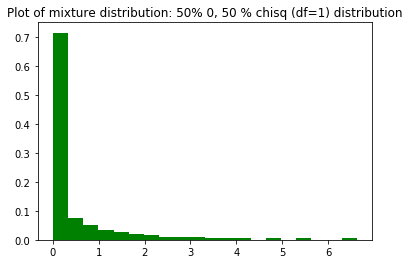

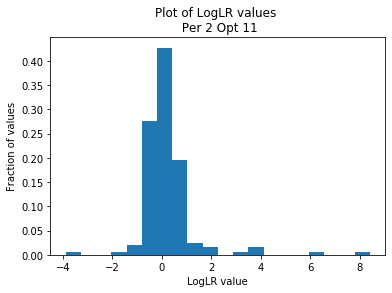

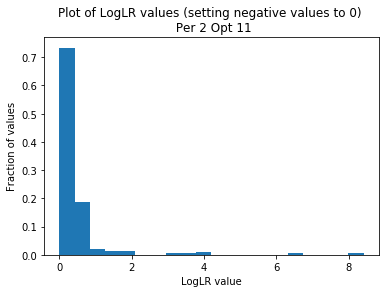

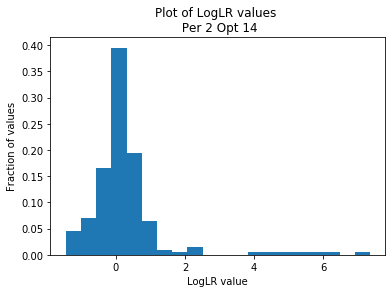

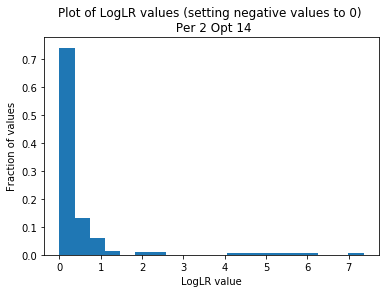

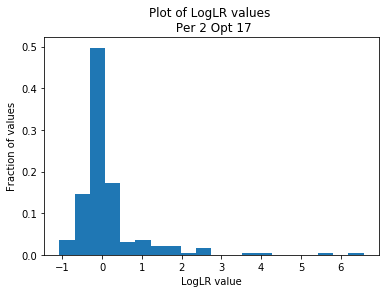

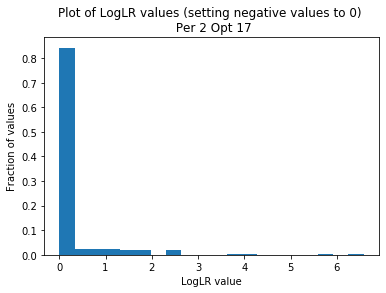

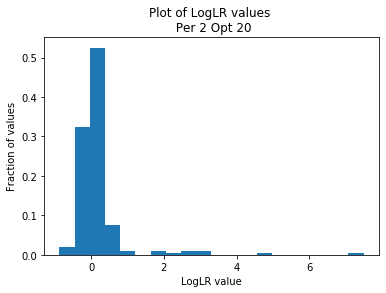

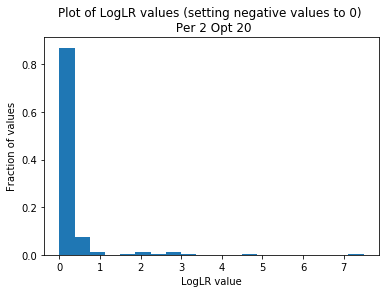

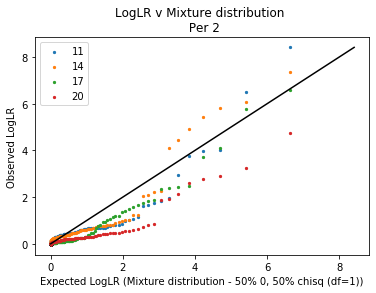

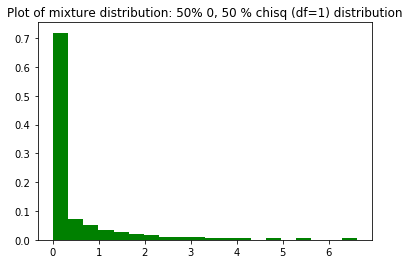

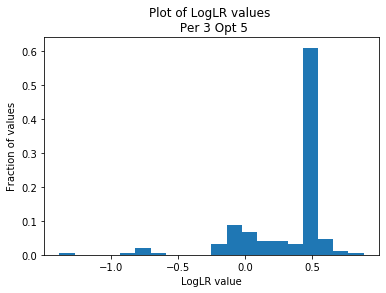

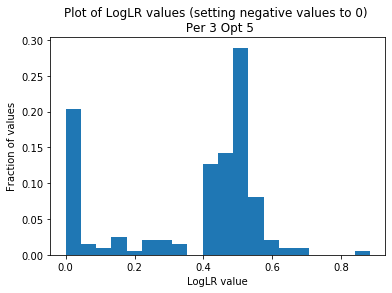

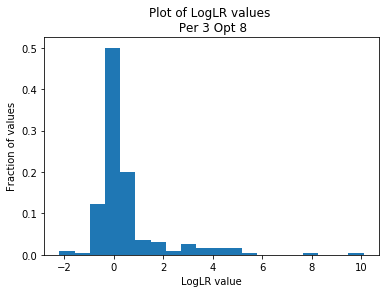

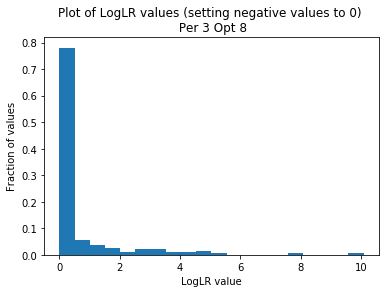

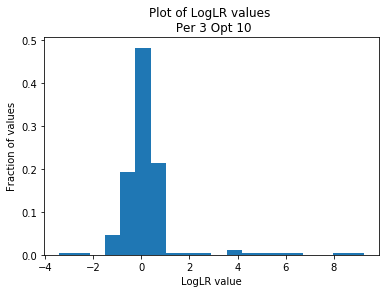

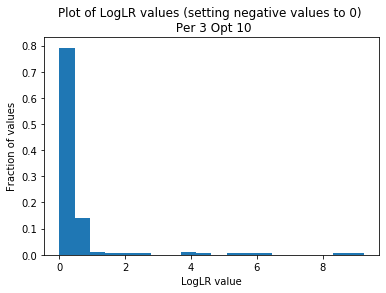

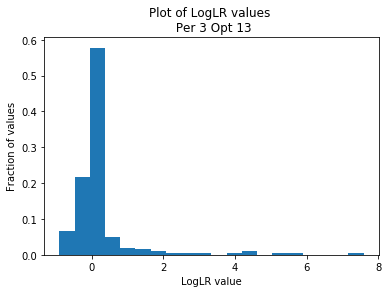

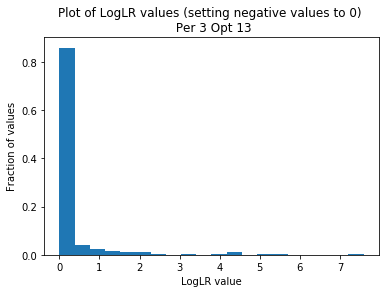

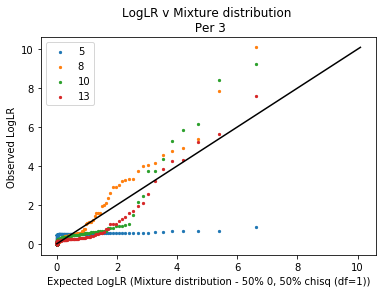

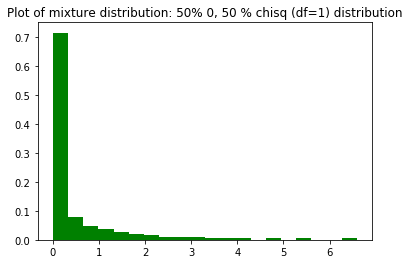

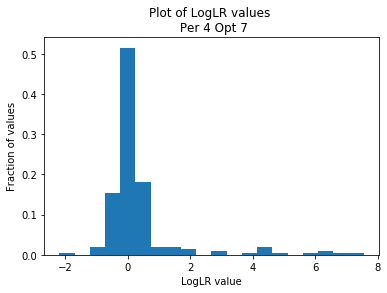

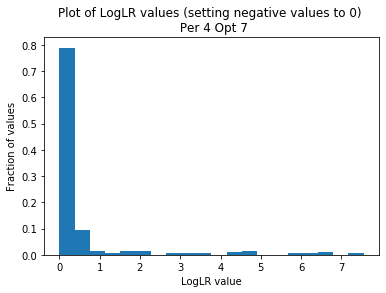

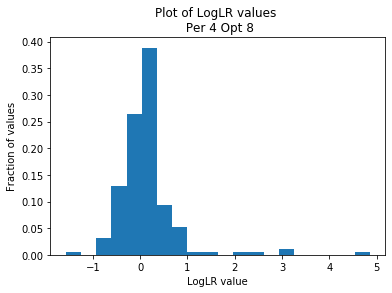

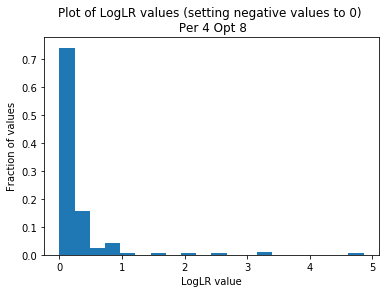

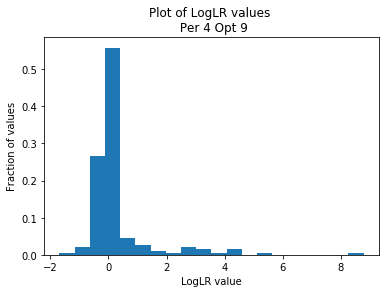

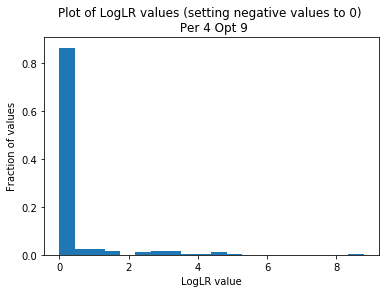

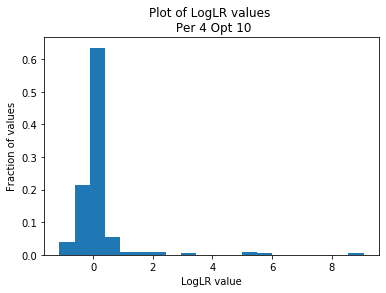

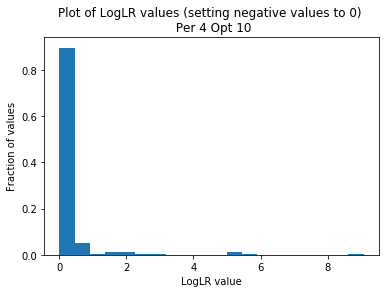

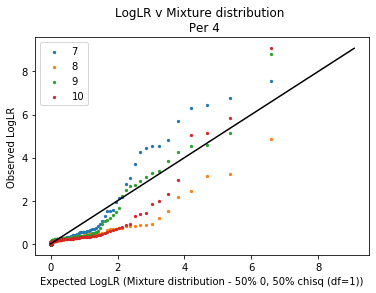

In [5]:
%%time
if __name__ == '__main__':
    main()